<a href="https://colab.research.google.com/github/Devisri2003/OIBSIP/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Email Spam Detection with Machine Learning**

##**Importing Libraries**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##**Load Dataset**

In [4]:
email=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding="ISO-8859-1")
email

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
email.drop(email.iloc[:,2:6],inplace=True,axis=1)
email.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##**Dataset Information**

In [6]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
email.shape

(5572, 2)

##**Visualization**

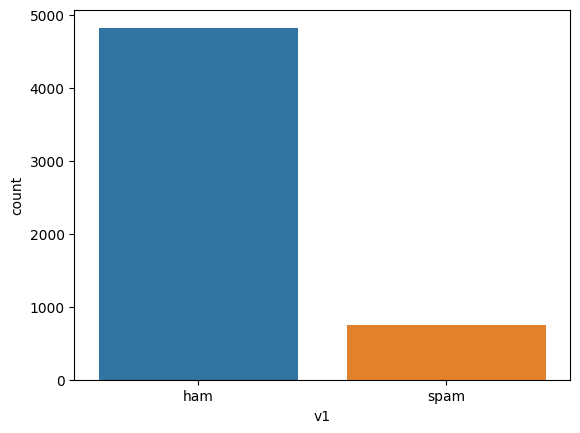

In [20]:
sns.countplot(x='v1',data=email)
plt.show()

##**Preprocessing**
###**Label Encoding**
Label Spam mail as 0 and Ham mail as 1

In [25]:
email.loc[email['v1']=='spam','v1']=0
email.loc[email['v1']=='ham','v1']=1

##**Seperating text and labels**

In [26]:
x=email.iloc[:,1]
y=email.iloc[:,0]

In [27]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [28]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: v1, dtype: object

##**Splitting dataset into training and testing data**

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [30]:
x_train.shape

(4457,)

In [31]:
x_test.shape

(1115,)

##**Feature Extraction**
Transform the text data to feature vectors that can be used as input to the logistic regression

In [32]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english')
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [33]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [34]:
x_train

5281               And how you will do that, princess? :)
1300    Those cocksuckers. If it makes you feel better...
5128    Wot about on wed nite I am 3 then but only til 9!
1808    Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
856                         Going to take your babe out ?
                              ...                        
1180                           I'm in chennai velachery:)
3441    Save money on wedding lingerie at www.bridal.p...
1344                     Were somewhere on Fredericksburg
4623    Jus finish blowing my hair. U finish dinner al...
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: v2, Length: 4457, dtype: object

In [36]:
print(x_train_features)

  (0, 5241)	1.0
  (1, 7148)	0.2950486239663227
  (1, 1149)	0.22213445141899318
  (1, 3633)	0.3056372583510937
  (1, 4681)	0.3205611003164585
  (1, 2979)	0.3056372583510937
  (1, 7345)	0.3205611003164585
  (1, 3609)	0.3205611003164585
  (1, 1273)	0.2162798012470006
  (1, 2723)	0.40416965820279876
  (1, 4191)	0.2358104883587932
  (1, 1821)	0.3205611003164585
  (2, 6683)	0.4654202581212151
  (2, 4637)	0.4836244486792649
  (2, 7194)	0.5652136576518605
  (2, 7346)	0.4796091087269546
  (3, 3943)	0.22625649010390378
  (3, 4814)	0.2480345894740787
  (3, 4067)	0.2819841017755336
  (3, 3285)	0.2630574879894589
  (3, 2245)	0.2563022871346642
  (3, 5508)	0.2819841017755336
  (3, 2425)	0.20571870827762773
  (3, 5750)	0.2819841017755336
  (3, 4644)	0.2433971665322199
  :	:
  (4453, 1469)	0.26998715149094793
  (4453, 4556)	0.22195932904459306
  (4453, 2182)	0.22969008173546485
  (4453, 1747)	0.2319260027065648
  (4453, 6899)	0.1856752236534643
  (4453, 4428)	0.19386485392218164
  (4453, 7377)	0.17350

##**Building Model**

In [ ]:
model=LogisticRegression()
model.fit(x_train_features,y_train)

LogisticRegression()

##**Evaluate the model**

In [ ]:
predictions=model.predict(x_train_features)
score=accuracy_score(y_train,predictions)
score

0.97083239847431

In [ ]:
predictions1=model.predict(x_test_features)
score1=accuracy_score(y_test,predictions1)
score1

0.9623318385650225

In [ ]:
cm=confusion_matrix(y_test,predictions1)
cm

array([[110,  40],
       [  2, 963]])